In [42]:
import xarray as xr
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import xvec

from shapely.geometry import Point

import cartopy.crs as ccrs
epsg_3031 = ccrs.Stereographic(central_latitude=-90, true_scale_latitude=-71)

In [22]:
ds = xr.open_dataset("/resstore/b0133/eeraws/data/ocean_ice_profiles/110036.nc", chunks='auto')
ds = ds.sel(SCALAR=0, drop=True)
ds

<xarray.Dataset> Size: 4GB
Dimensions:               (NB_DATA: 804009, NB_PROF: 601, STRING63: 63)
Dimensions without coordinates: NB_DATA, NB_PROF, STRING63
Data variables:
    lat                   (NB_DATA) float64 6MB dask.array<chunksize=(804009,), meta=np.ndarray>
    lon                   (NB_DATA) float64 6MB dask.array<chunksize=(804009,), meta=np.ndarray>
    dyr                   (NB_DATA) float64 6MB dask.array<chunksize=(804009,), meta=np.ndarray>
    source_flag           (NB_DATA) float64 6MB dask.array<chunksize=(804009,), meta=np.ndarray>
    instrument_type_flag  (NB_DATA) float64 6MB dask.array<chunksize=(804009,), meta=np.ndarray>
    pres                  (NB_PROF) float64 5kB dask.array<chunksize=(601,), meta=np.ndarray>
    ct                    (NB_PROF, NB_DATA) float64 4GB dask.array<chunksize=(111, 151145), meta=np.ndarray>
    bathy                 (NB_DATA) float64 6MB dask.array<chunksize=(804009,), meta=np.ndarray>
    doi                   (STRING63, NB_DATA) |S1 51MB dask.array<chunksize=(63, 804009), meta=np.ndarray>
    access_date           (NB_DATA) float64 6MB dask.array<chunksize=(804009,), meta=np.ndarray>
Attributes:
    Authors:        Shenjie Zhou, shezhou@bas.ac.uk
    Creation Date:  09-April-2024
    Description:    OCEAN:ICE D1.1 - Pan-Antarctic (90S-45S) temperature prof...

In [27]:
ds.lat.load()
ds.lon.load()

<xarray.DataArray 'lat' (NB_DATA: 804009)> Size: 6MB
array([-48.65000153, -52.51699829, -53.05799866, ..., -55.9304    ,
       -56.1105    , -56.2498    ])
Dimensions without coordinates: NB_DATA
Attributes:
    long_name:  latitude
    unit:       degree north
    valid_min:  -90.0
    valid_max:  90.0

In [49]:
ds.dyr.isel(NB_DATA=0).values

array(8382.)

In [54]:
ds.dyr.values

array([ 8382.        ,  8384.        ,  8385.        , ...,
       27078.38194444, 27078.63888889, 27078.88194444])

In [64]:
from datetime import date, timedelta
reference_start = date(1950,1,1)
dates = [reference_start + timedelta(days_since) for days_since in ds.dyr.values]

In [84]:
gdf = gpd.GeoDataFrame({'geometry':[Point(x,y) for x,y in zip(ds.lon.values, ds.lat.values)], 
                        'source_flag':ds.source_flag.values, 
                        'instrument_type_flag':ds.instrument_type_flag.values, 
                        'time':dates,
                       'bathy':ds.bathy.values,}, 
                       geometry='geometry', crs='EPSG:4326')
gdf = gdf.to_crs(epsg_3031)

In [85]:
gdf

,geometry,source_flag,instrument_type_flag,time,bathy
0,POINT (-3373414.758 3259148.328),1.0,1.0,1972-12-13,-3029.50
1,POINT (-3053650.106 2910493.452),1.0,1.0,1972-12-15,-3453.00
2,POINT (-3073135.039 2793887.709),1.0,1.0,1972-12-16,-3002.25
3,POINT (-3126199.874 2732735.904),1.0,1.0,1972-12-16,-3138.50
4,POINT (-3099808.586 2752138.699),1.0,1.0,1972-12-16,-2996.50
...,...,...,...,...,...
804004,POINT (3432347.282 1767085.322),8.0,NaN,2024-02-19,-4612.75
804005,POINT (3429598.385 1768169.708),8.0,NaN,2024-02-19,-4593.75
804006,POINT (3376134.622 1766621.476),8.0,NaN,2024-02-20,-4624.50
804007,POINT (3343161.385 1783380.142),8.0,NaN,2024-02-20,-5043.25


In [69]:
coast = gpd.read_file('/resstore/b0133/eeraws/scripts/ais-processing/data/add_coastline_medium_res_polygon_v7_9.shp.zip')

In [74]:
test_slice = gdf[gdf['time'] > date(2014,10,1)]

In [75]:
test_slice

,geometry,source_flag,instrument_type_flag,time
28967,POINT (473414.149 -5118139.937),1.0,1.0,2014-10-22
28968,POINT (492372.214 -5102115.397),1.0,1.0,2014-10-26
28969,POINT (797153.762 -4889594.097),1.0,1.0,2014-11-27
28970,POINT (803289.721 -4877017.737),1.0,1.0,2014-11-27
28971,POINT (827561.547 -4844232.409),1.0,1.0,2014-11-28
...,...,...,...,...
804004,POINT (3432347.282 1767085.322),8.0,NaN,2024-02-19
804005,POINT (3429598.385 1768169.708),8.0,NaN,2024-02-19
804006,POINT (3376134.622 1766621.476),8.0,NaN,2024-02-20
804007,POINT (3343161.385 1783380.142),8.0,NaN,2024-02-20


<Axes: >

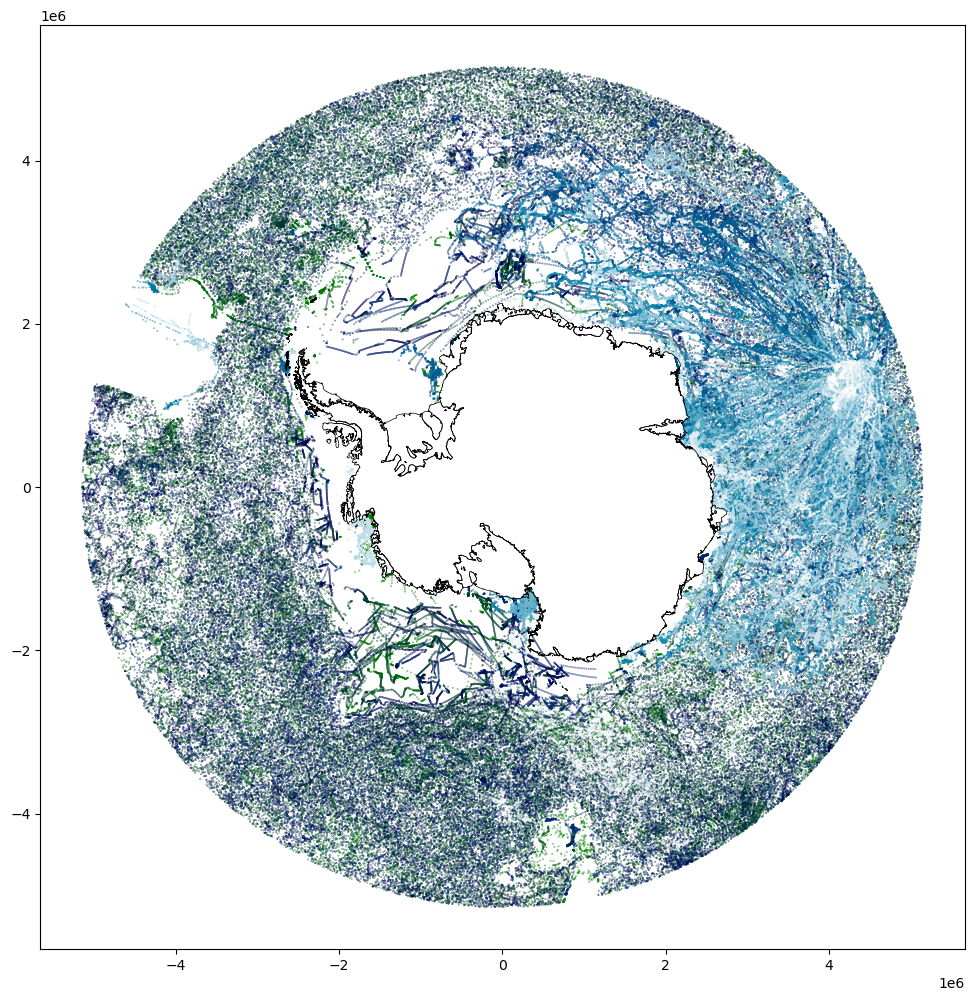

In [86]:
ax = test_slice.plot(figsize=(12,12), markersize=0.05, c=gdf['bathy'], cmap='ocean')
coast.plot(facecolor='none', ax=ax, linewidth=0.5)

<Axes: >

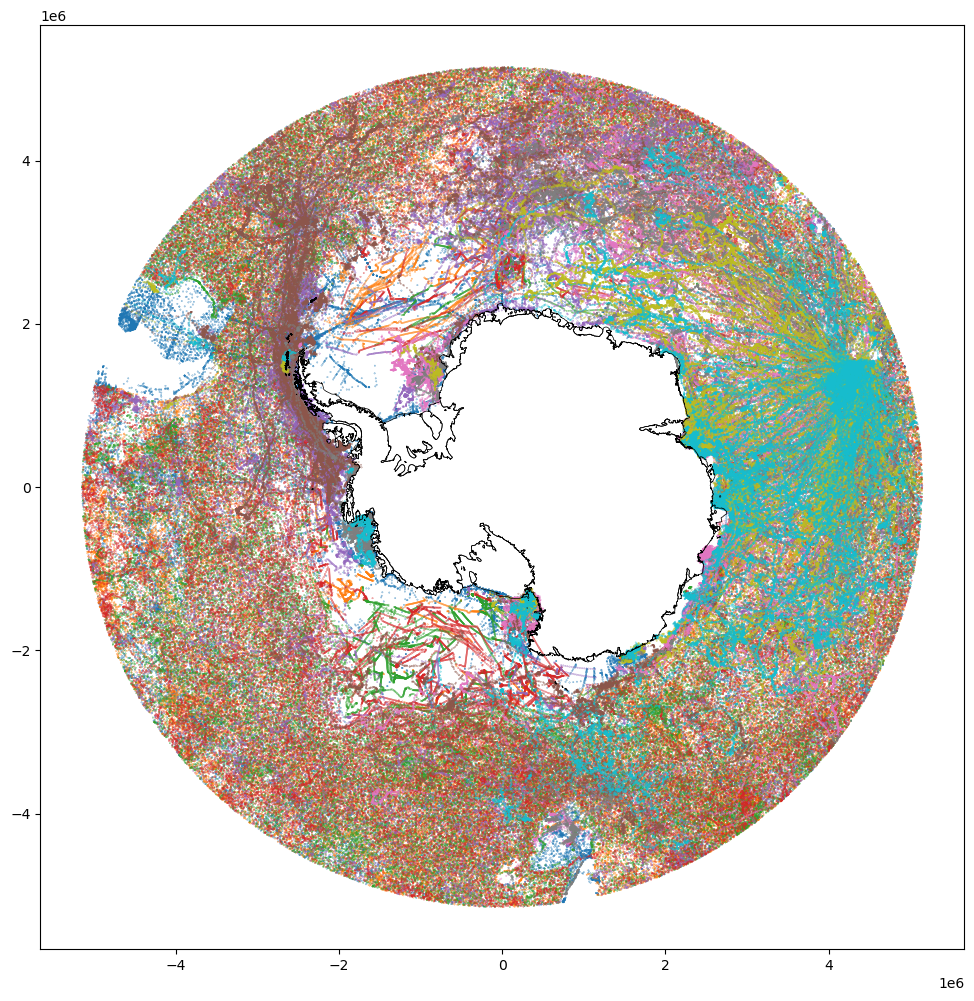

In [41]:
ax = gdf.plot(figsize=(12,12), markersize=0.05, c=gdf['instrument_type_flag'], cmap='tab10')
coast.plot(facecolor='none', ax=ax, linewidth=0.5)

In [111]:
ds2 = xr.open_dataset("/resstore/b0133/eeraws/data/ocean_ice_profiles/110037.nc", chunks='auto')
ds2

<xarray.Dataset>
Dimensions:               (SCALAR: 1, NB_DATA: 804009, NB_PROF: 601,
                           STRING63: 63)
Dimensions without coordinates: SCALAR, NB_DATA, NB_PROF, STRING63
Data variables:
    lat                   (SCALAR, NB_DATA) float64 dask.array<chunksize=(1, 804009), meta=np.ndarray>
    lon                   (SCALAR, NB_DATA) float64 dask.array<chunksize=(1, 804009), meta=np.ndarray>
    dyr                   (SCALAR, NB_DATA) float64 dask.array<chunksize=(1, 804009), meta=np.ndarray>
    source_flag           (SCALAR, NB_DATA) float64 dask.array<chunksize=(1, 804009), meta=np.ndarray>
    instrument_type_flag  (SCALAR, NB_DATA) float64 dask.array<chunksize=(1, 804009), meta=np.ndarray>
    pres                  (NB_PROF, SCALAR) float64 dask.array<chunksize=(601, 1), meta=np.ndarray>
    sa                    (NB_PROF, NB_DATA) float64 dask.array<chunksize=(111, 151145), meta=np.ndarray>
    bathy                 (SCALAR, NB_DATA) float64 dask.array<chunksize=(1, 804009), meta=np.ndarray>
    doi                   (STRING63, NB_DATA) |S1 dask.array<chunksize=(63, 804009), meta=np.ndarray>
    access_date           (SCALAR, NB_DATA) float64 dask.array<chunksize=(1, 804009), meta=np.ndarray>
Attributes:
    Authors:        Shenjie Zhou, shezhou@bas.ac.uk
    Creation Date:  09-April-2024
    Description:    OCEAN:ICE D1.1 - Pan-Antarctic (90S-45S) salinity profile...

True

<xarray.DataArray 'lat' (SCALAR: 1, NB_DATA: 804009)>
array([[-48.65000153, -52.51699829, -53.05799866, ..., -55.9304    ,
        -56.1105    , -56.2498    ]])
Dimensions without coordinates: SCALAR, NB_DATA
Attributes:
    long_name:  latitude
    unit:       degree north
    valid_min:  -90.0
    valid_max:  90.0

In [89]:
ds.load()

<xarray.Dataset>
Dimensions:               (SCALAR: 1, NB_DATA: 804009, NB_PROF: 601,
                           STRING63: 63)
Coordinates:
    lat                   (SCALAR, NB_DATA) float64 -48.65 -52.52 ... -56.25
    lon                   (SCALAR, NB_DATA) float64 -45.99 -46.38 ... 61.82
Dimensions without coordinates: SCALAR, NB_DATA, NB_PROF, STRING63
Data variables:
    dyr                   (SCALAR, NB_DATA) float64 8.382e+03 ... 2.708e+04
    source_flag           (SCALAR, NB_DATA) float64 1.0 1.0 1.0 ... 8.0 8.0 8.0
    instrument_type_flag  (SCALAR, NB_DATA) float64 1.0 1.0 1.0 ... nan nan nan
    pres                  (NB_PROF, SCALAR) float64 5.0 15.0 ... 6.005e+03
    ct                    (NB_PROF, NB_DATA) float64 8.628 4.605 ... nan nan
    bathy                 (SCALAR, NB_DATA) float64 -3.03e+03 ... -4.924e+03
    doi                   (STRING63, NB_DATA) |S1 b'w' b'w' b'w' ... b'l' b'l'
    access_date           (SCALAR, NB_DATA) float64 2.66e+04 ... 2.717e+04
Attributes:
    Authors:        Shenjie Zhou, shezhou@bas.ac.uk
    Creation Date:  09-April-2024
    Description:    OCEAN:ICE D1.1 - Pan-Antarctic (90S-45S) temperature prof...

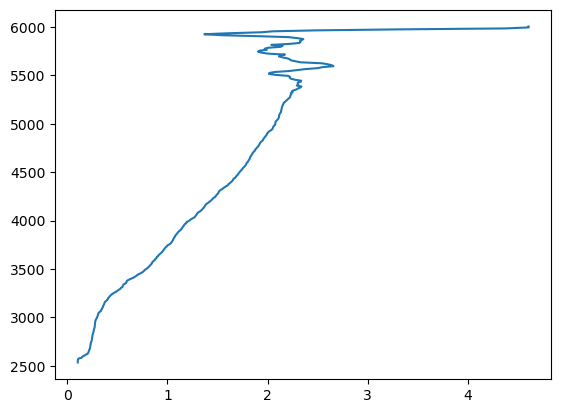

In [109]:
import numpy as np
plt.plot(ds.isel(NB_DATA=1).ct, np.flip(ds.isel(NB_DATA=1).pres))
plt.show()

In [101]:
ds.isel(NB_DATA=1).plot(x='ct', y='pres')
plt.show()


ValueError: Dataset.plot cannot be called directly. Use an explicit plot method, e.g. ds.plot.scatter(...)

In [94]:
ds.lat.load()
ds.lon.load()

<xarray.DataArray 'lon' (SCALAR: 1, NB_DATA: 804009)>
array([[-45.98699951, -46.375     , -47.72499847, ...,  62.3784    ,
         61.9227    ,  61.8202    ]])
Dimensions without coordinates: SCALAR, NB_DATA
Attributes:
    long_name:  longitude
    unit:       degree east
    valid_min:  -180.0
    valid_max:  180.0

In [88]:
ds

<xarray.Dataset>
Dimensions:               (SCALAR: 1, NB_DATA: 804009, NB_PROF: 601,
                           STRING63: 63)
Coordinates:
    lat                   (SCALAR, NB_DATA) float64 -48.65 -52.52 ... -56.25
    lon                   (SCALAR, NB_DATA) float64 -45.99 -46.38 ... 61.82
Dimensions without coordinates: SCALAR, NB_DATA, NB_PROF, STRING63
Data variables:
    dyr                   (SCALAR, NB_DATA) float64 dask.array<chunksize=(1, 804009), meta=np.ndarray>
    source_flag           (SCALAR, NB_DATA) float64 dask.array<chunksize=(1, 804009), meta=np.ndarray>
    instrument_type_flag  (SCALAR, NB_DATA) float64 dask.array<chunksize=(1, 804009), meta=np.ndarray>
    pres                  (NB_PROF, SCALAR) float64 dask.array<chunksize=(601, 1), meta=np.ndarray>
    ct                    (NB_PROF, NB_DATA) float64 dask.array<chunksize=(111, 151145), meta=np.ndarray>
    bathy                 (SCALAR, NB_DATA) float64 dask.array<chunksize=(1, 804009), meta=np.ndarray>
    doi                   (STRING63, NB_DATA) |S1 dask.array<chunksize=(63, 804009), meta=np.ndarray>
    access_date           (SCALAR, NB_DATA) float64 dask.array<chunksize=(1, 804009), meta=np.ndarray>
Attributes:
    Authors:        Shenjie Zhou, shezhou@bas.ac.uk
    Creation Date:  09-April-2024
    Description:    OCEAN:ICE D1.1 - Pan-Antarctic (90S-45S) temperature prof...

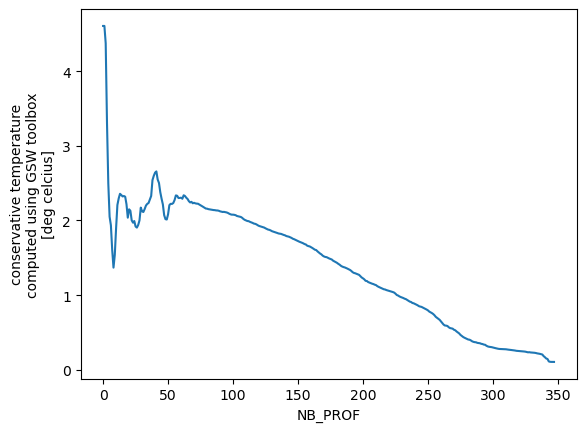

In [74]:
ds.ct.isel(NB_DATA=1).plot()
plt.show()


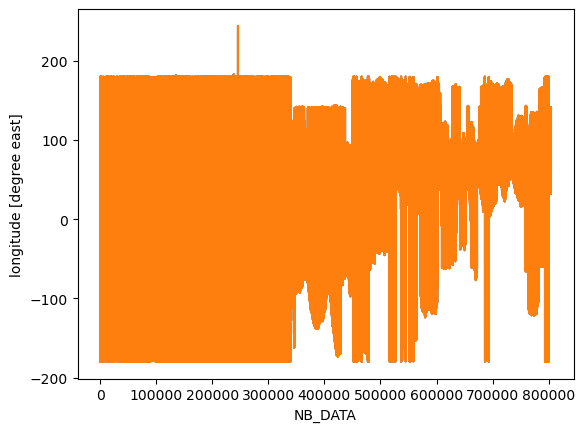

In [21]:
import matplotlib.pyplot as plt
ds.lon.plot()
plt.show()

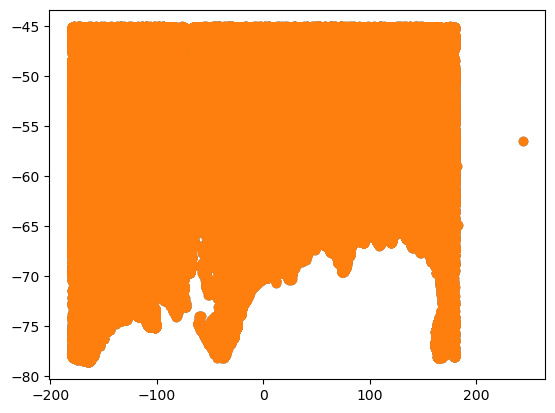

In [23]:
plt.scatter(ds.lon, ds.lat)
plt.show()

In [43]:
xr.open_dataset("/resstore/b0133/eeraws/data/ocean_ice_profiles/110105.2.zip", chunks='auto')

ValueError: did not find a match in any of xarray's currently installed IO backends ['netcdf4', 'scipy', 'rasterio', 'zarr']. Consider explicitly selecting one of the installed engines via the ``engine`` parameter, or installing additional IO dependencies, see:
https://docs.xarray.dev/en/stable/getting-started-guide/installing.html
https://docs.xarray.dev/en/stable/user-guide/io.html

In [61]:
!cd 110105
!unzip /resstore/b0133/eeraws/data/ocean_ice_profiles/110105.2.zip

Archive:  /resstore/b0133/eeraws/data/ocean_ice_profiles/110105.2.zip
  inflating: A_1978.nc               
  inflating: A.nc                    
  inflating: ADP1.nc                 
  inflating: ADP2.nc                 
  inflating: amisor1.nc              
  inflating: amisor2.nc              
  inflating: amisor3.nc              
  inflating: amisor4.nc              
  inflating: amisor5.nc              
  inflating: amisor6.nc              
  inflating: amisor7.nc              
  inflating: amisor8.nc              
  inflating: amisor9.nc              
  inflating: AWI101_1986.nc          
  inflating: AWI103_1986.nc          
  inflating: AWI104_1986.nc          
  inflating: AWI201_1986.nc          
  inflating: AWI201_1987.nc          
  inflating: AWI202_1987.nc          
  inflating: AWI203_1989.nc          
  inflating: AWI204_1989.nc          
  inflating: AWI205_1989.nc          
  inflating: AWI206_1989.nc          
  inflating: AWI206_1990.nc          
  inflating: AWI20